In [1]:
def plot_history(history):    
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Recurrent Neural Networks

* Convnets - Dense Neural networks have no memory
* They are called FEED FORWARD neural networks
    * IMDB example: an entire movie review was transformed into a single large vector, processed in one go
* RNNs have memory
* RNN has an internal loop. The state of the RNN is reset between processing two different, independent sequences.

The following example is designed to make this clear

In [ ]:
### DO NOT RUN

### Simplified pseudocode
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
    
### Detailed pseudocode
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

In [ ]:
### Naive Numpy Implementation
import numpy as np
timesteps = 100 # number of "timesteps" (samples - I guess), in the input sequence
input_features = 32 # Dimensionality of input space
output_features = 64 # Dimensionality of output space

inputs = np.random.random((timesteps, input_features)) #random initialization

state_t = np.zeros((output_features,)) #initial state all 0 features

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,)) # bias term, mathematically, has to be equal to the number of output features

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [ ]:
# Let's interrogate the structure a bit
print(f'Input shape is {inputs.shape}')
print(f'W shape is {W.shape}')
print(f'U shape is {U.shape}')
print(f'b shape is {b.shape}')
print(f'output_t shape is {output_t.shape}')
print(f'successive output length is {len(successive_outputs)}')
print(f'final_output_sequence shape is {final_output_sequence.shape}') #final output is a 2D tensor of shape timesteps, output_features

### Keras implementation
SimpleRNN can run in two modes
* Mode 1: Return the full sequences of successive outputs for each timestamp
    * This would be a 3D tensor of shape (batch_size, timesteps, output_features)
* Mode 2: Only return the last output
    * 2D tensor of shape (batch_size, output_features)

Example returning only the output from the last timestep ahead!

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Stack Recurrent layers one after the other
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), ' train sequences')
print(len(input_test), ' test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(f'input_train shape: {input_train.shape}')
print(f'input_test shape: {input_test.shape}')

Loading data...
25000  train sequences
25000  test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
plot_history(history)

In [5]:
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 177s 9ms/step - loss: 0.4982 - acc: 0.7680 - val_loss: 0.3381 - val_acc: 0.8664
Epoch 2/10
20000/20000 [==============================] - 164s 8ms/step - loss: 0.2928 - acc: 0.8840 - val_loss: 0.3042 - val_acc: 0.8704
Epoch 3/10
20000/20000 [==============================] - 164s 8ms/step - loss: 0.2358 - acc: 0.9114 - val_loss: 0.3254 - val_acc: 0.8776
Epoch 4/10
20000/20000 [==============================] - 163s 8ms/step - loss: 0.2018 - acc: 0.9256 - val_loss: 0.2913 - val_acc: 0.8750
Epoch 5/10
20000/20000 [==============================] - 164s 8ms/step - loss: 0.1792 - acc: 0.9334 - val_loss: 0.2956 - val_acc: 0.8826
Epoch 6/10
20000/20000 [==============================] - 163s 8ms/step - loss: 0.1627 - acc: 0.9420 - val_loss: 0.4534 - val_acc: 0.8518
Epoch 7/10
20000/20000 [==============================] - 164s 8ms/step - l

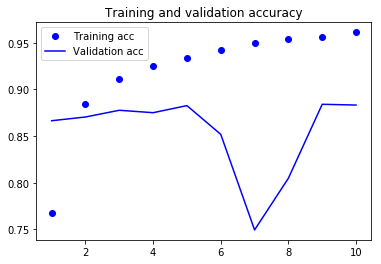

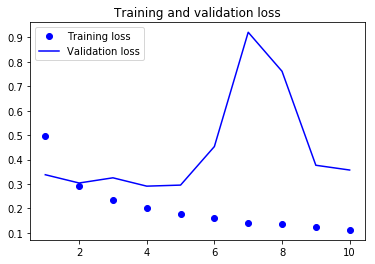

In [7]:
plot_history(history)